In [108]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [40]:
wine = pd.read_csv('data/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [43]:
for x in wine.columns:
    print(f"The percentage of empty cells in column {x} is {round(wine[x].isna().sum()/len(wine[x])*100,2)} %.")

The percentage of empty cells in column fixed acidity is 0.0 %.
The percentage of empty cells in column volatile acidity is 0.0 %.
The percentage of empty cells in column citric acid is 0.0 %.
The percentage of empty cells in column residual sugar is 0.0 %.
The percentage of empty cells in column chlorides is 0.0 %.
The percentage of empty cells in column free sulfur dioxide is 0.0 %.
The percentage of empty cells in column total sulfur dioxide is 0.0 %.
The percentage of empty cells in column density is 0.0 %.
The percentage of empty cells in column pH is 0.0 %.
The percentage of empty cells in column sulphates is 0.0 %.
The percentage of empty cells in column alcohol is 0.0 %.
The percentage of empty cells in column quality is 0.0 %.


In [45]:
wine['good_quality'] = wine['quality'].apply(lambda x: True if x >= 7 else False)

wine.drop(columns='quality', inplace=True)

In [49]:
features = wine.select_dtypes(include=['number'])
target = wine['good_quality'].astype(int)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [60]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [122]:
pred = knn.predict(X_test)

In [124]:
knn.score(X_test, y_test)

0.85

##Feature Engineering


In [17]:
normalizer = MinMaxScaler()

In [18]:
normalizer.fit(X_train)

MinMaxScaler()

In [19]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [21]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.362832,0.390411,0.31,0.143836,0.123539,0.328358,0.265018,0.743759,0.582677,0.226994,0.492308
1,0.132743,0.061644,0.40,0.034247,0.090150,0.589552,0.561837,0.082966,0.401575,0.134969,0.538462
2,0.557522,0.184932,0.47,0.061644,0.176962,0.074627,0.028269,0.596916,0.440945,0.233129,0.215385
3,0.371681,0.386986,0.26,0.047945,0.126878,0.223881,0.060071,0.504405,0.456693,0.061350,0.153846
4,0.336283,0.626712,0.15,0.349315,0.101836,0.149254,0.169611,0.655653,0.496063,0.073620,0.230769


In [22]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.274336,0.301370,0.08,0.109589,0.170284,0.194030,0.141343,0.516153,0.393701,0.177914,0.184615
1,0.283186,0.260274,0.17,0.047945,0.116861,0.298507,0.339223,0.435389,0.511811,0.067485,0.169231
2,0.539823,0.376712,0.22,0.123288,0.158598,0.238806,0.098940,0.758443,0.425197,0.374233,0.230769
3,0.345133,0.232877,0.31,0.092466,0.110184,0.462687,0.183746,0.582232,0.464567,0.104294,0.215385
4,0.185841,0.232877,0.24,0.054795,0.108514,0.253731,0.098940,0.347283,0.511811,0.141104,0.338462


In [23]:
knn.score(X_test_norm, y_test)

0.853125

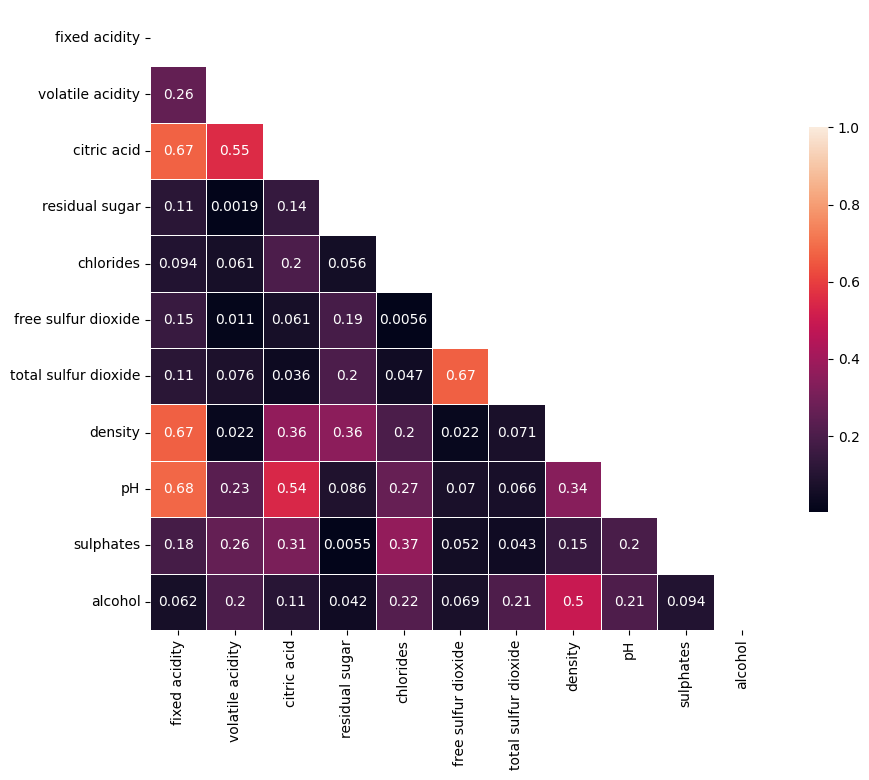

In [24]:
corr=np.abs(wine.drop(columns = ["good_quality"]).corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [25]:
X_train_reduced = X_train_norm.drop(columns = ["free sulfur dioxide"])
X_test_reduced = X_test_norm.drop(columns = ["free sulfur dioxide"])

In [26]:
knn.fit(X_train_reduced, y_train)
knn.score(X_test_reduced, y_test)

0.8875

###Logistic Regression###

In [28]:
from sklearn.preprocessing import StandardScaler
wine.columns
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

scaler = StandardScaler()
wine[numerical_features] = scaler.fit_transform(wine[numerical_features])

In [29]:
features = wine.drop(columns='good_quality')
target = wine['good_quality'].astype(int)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [32]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [33]:
pred = log_reg.predict(X_test)

In [70]:
log_reg.score(X_test, y_test)

0.75

In [126]:
log_reg.coef_

array([[ 0.44563646, -0.4865759 ,  0.07077434,  0.30520086, -0.31425923,
         0.12380692, -0.5966366 , -0.44947092,  0.03571465,  0.56377623,
         0.81856476]])

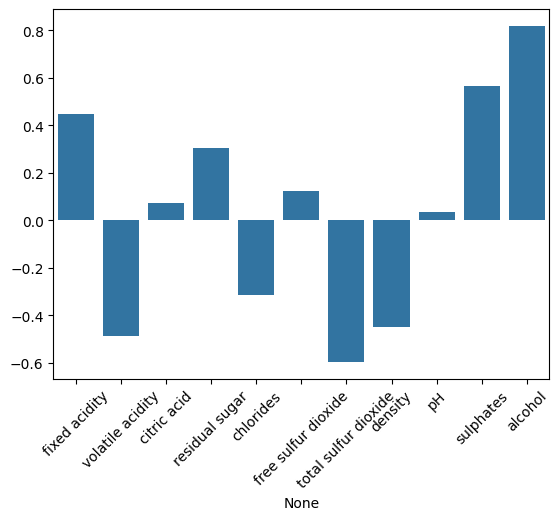

In [154]:
sns.barplot(x=X_train.columns, y=log_reg.coef_[0])
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.savefig('data/coefficiency_barplot.png', transparent=True)

In [72]:
tree = DecisionTreeClassifier(max_depth=5)

In [74]:
tree.fit(X_train_norm, y_train)

DecisionTreeClassifier(max_depth=5)

In [130]:
pred = tree.predict(X_test_norm)

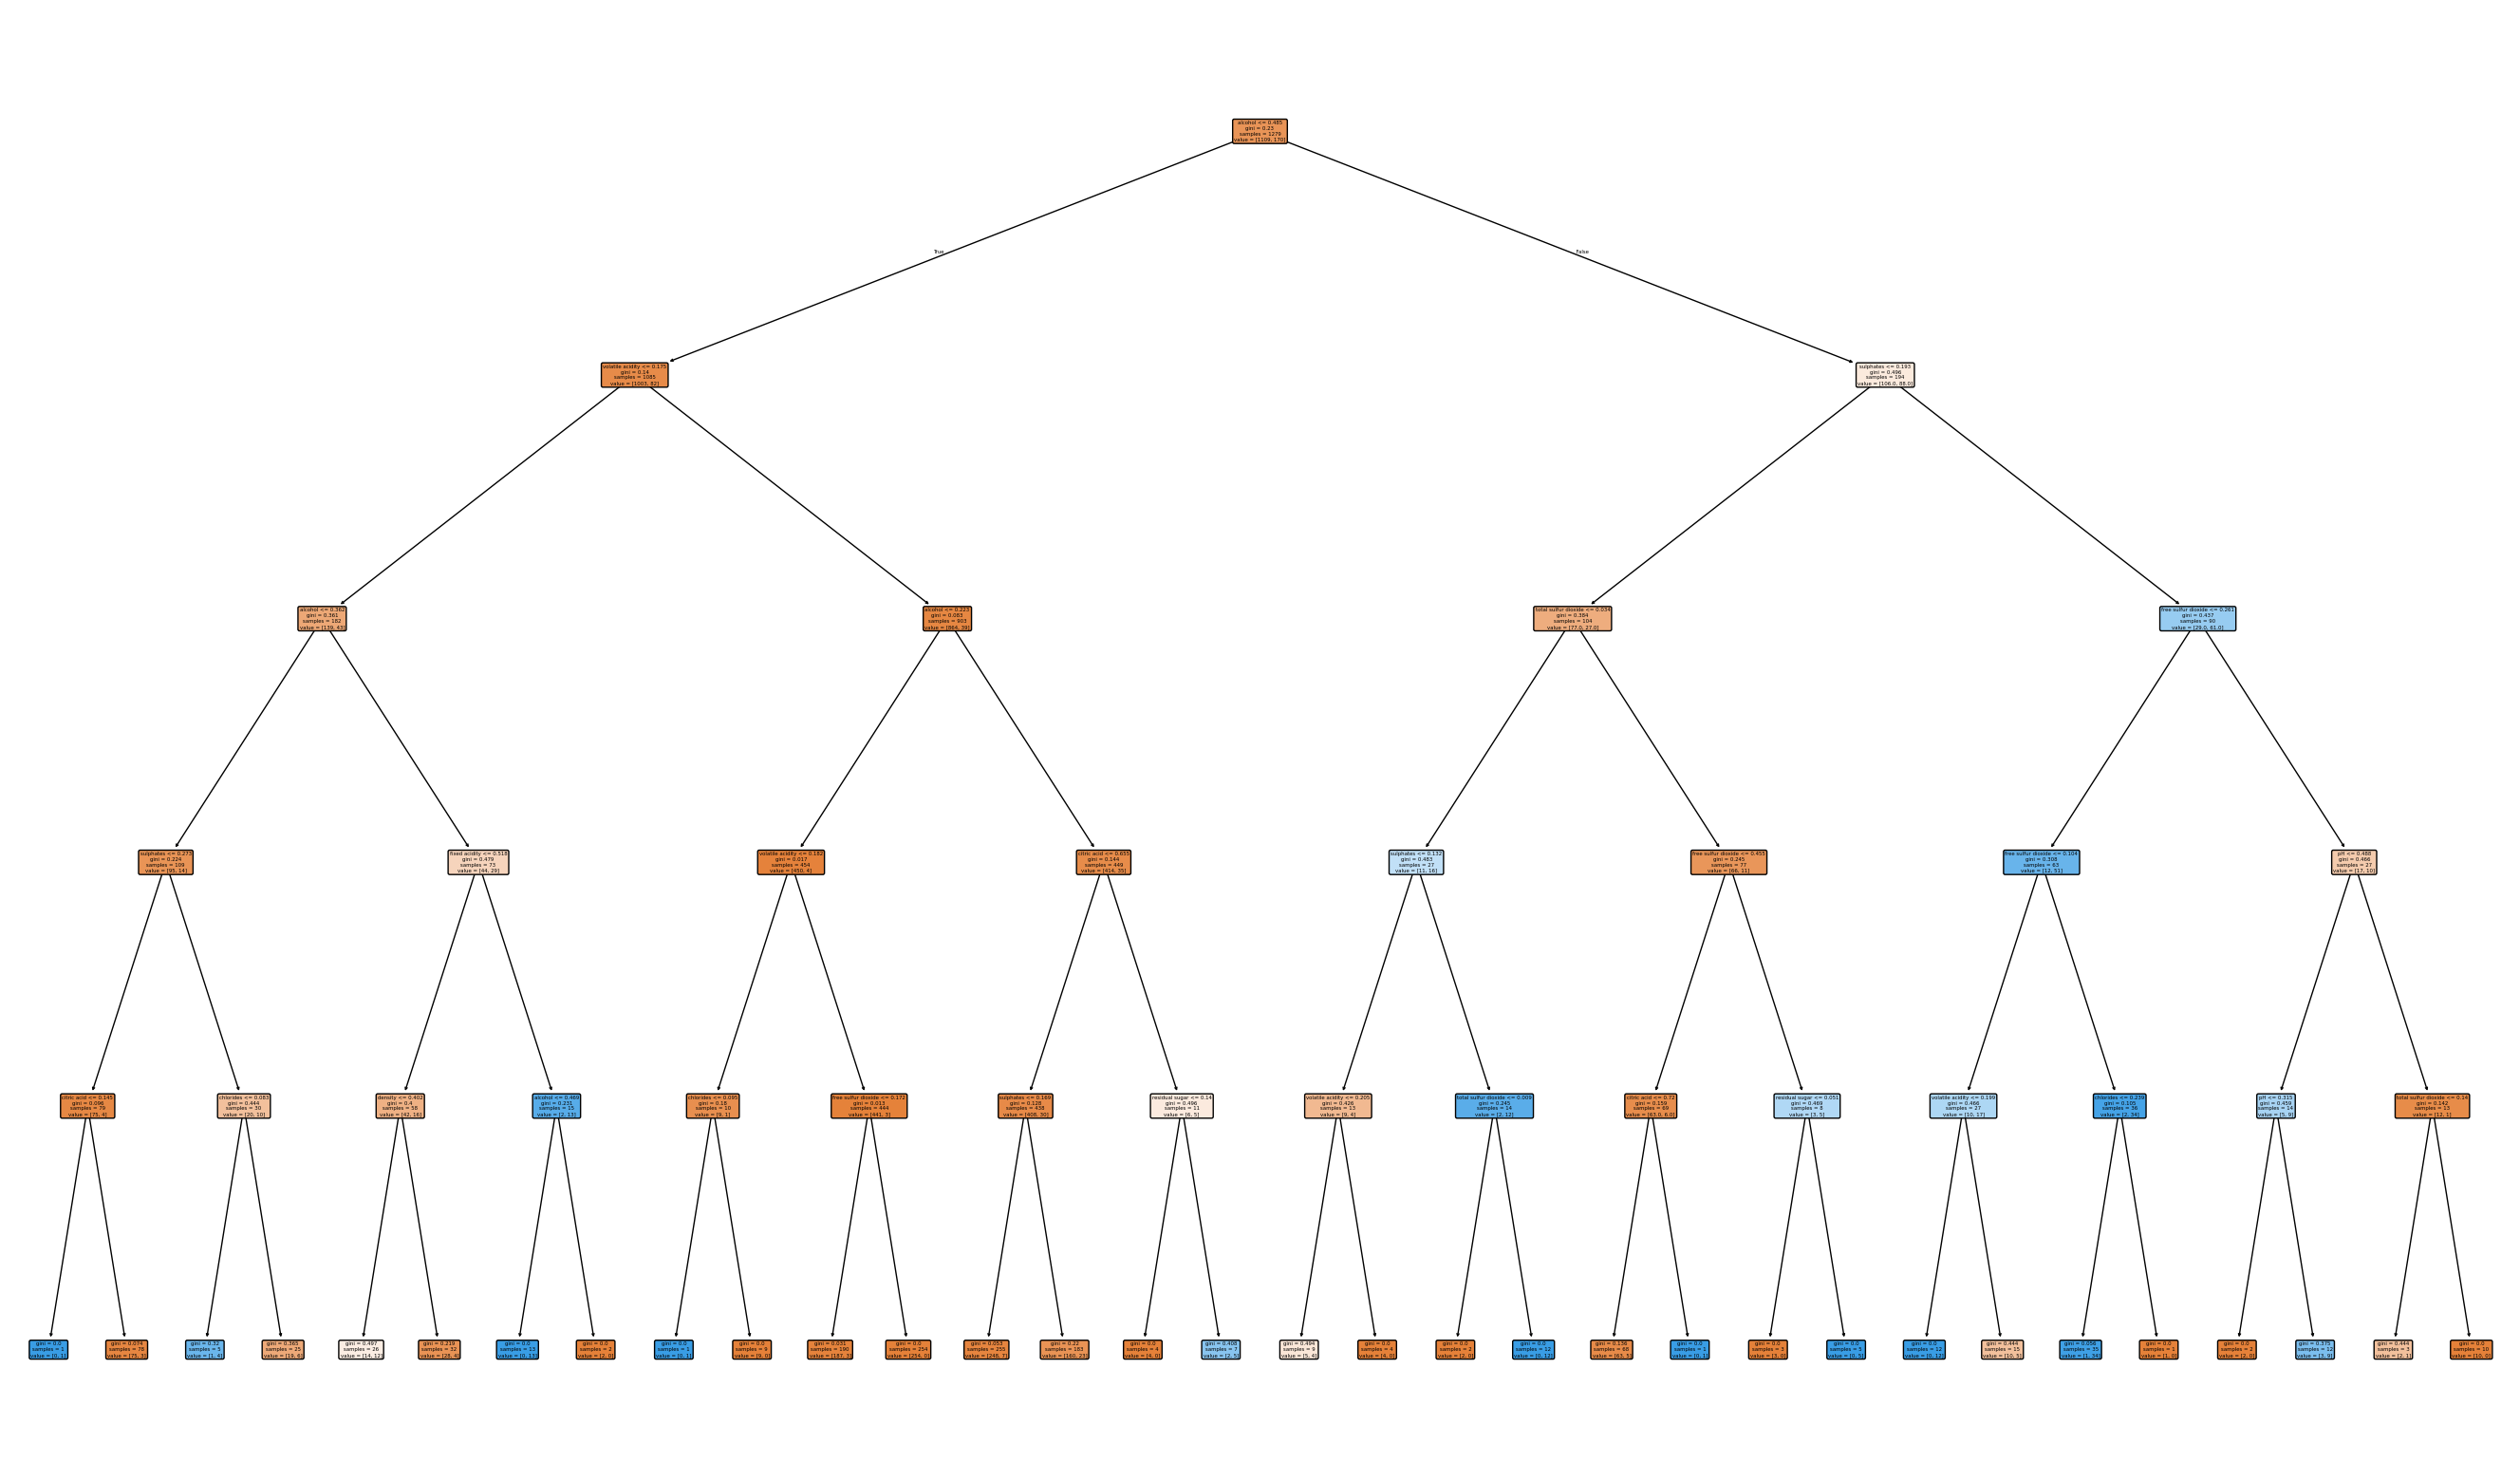

In [132]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
plot_tree(tree,filled = True, rounded=True,feature_names=list(X_train.columns))
plt.show()

In [140]:
bagging_class = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [142]:
bagging_class.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100)

In [143]:
bagging_class.score(X_test, y_test)

0.88125

In [134]:
forest_class = RandomForestClassifier(n_estimators=100,
                             max_depth=10, random_state=42)

In [136]:
forest_class.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [137]:
forest_class.score(X_test, y_test)

0.90625

In [92]:
X_test_norm.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
217,0.212389,0.342466,0.1,0.034247,0.098497,0.38806,0.201413,0.435389,0.425197,0.147239,0.123077


In [94]:
gb_class = GradientBoostingClassifier(max_depth=20,
                                   n_estimators=100)

In [96]:
gb_class.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=20)

In [98]:
gb_class.score(X_test, y_test)

0.884375

In [102]:
ada_class = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=100)

In [104]:
ada_class.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                   n_estimators=100)

In [106]:
ada_class.score(X_test, y_test)

0.878125

In [117]:
y_pred = forest_class.predict(X_test)

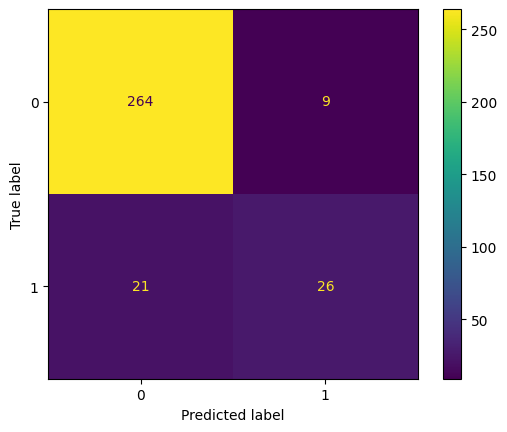

In [156]:
cm_train = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()
plt.savefig('data/confusion_matrix.png', transparent=True)

In [ ]:
# I predicted to be x axis, but is actually y axis